**All Twitter data used in this notebook was gathered by me.**
 * See [here.](https://github.com/alekseyvalouev/twitter-data-scraping)

In [18]:
# Imports

# Data Structures
import numpy  as np
import pandas as pd

# Language Processing 
import re
import nltk.corpus
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster
import pickle

# Visualization and Analysis
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
# Downloads
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alekseyvalouev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# removes stopwords from a tokenized list
def remove_stopwords(tokens, words):
    return [token for token in tokens if token not in words]

# apply stemming to a list of tokens
def apply_stemming(tokens, stemmer):
    return [stemmer.stem(token) for token in tokens]

# apply lemmatization to a list of tokens
def apply_lem(tokens, lemmatizer): 
    return [lemmatizer.lemmatize(token) for token in tokens]

# find words <= 2 letters or >= 21 letters
def find_two_letters(tokens):
    two_letters = []
    for token in tokens:
        if len(token) <= 2 or len(token) >= 21:
            two_letters.append(token)
    return two_letters

In [4]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    param_lem = WordNetLemmatizer()
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = find_two_letters(listOfTokens)

        listOfTokens = remove_stopwords(listOfTokens, stopwords)
        listOfTokens = remove_stopwords(listOfTokens, twoLetterWord)
        
        listOfTokens = apply_lem(listOfTokens, param_lem)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [5]:
df = pd.read_csv("twitter_data.csv", lineterminator="\n")

In [6]:
df = df.drop(["Unnamed: 0"], axis=1)

In [7]:
corpus = list(df["Text of Tweet"])

In [8]:
language = 'english'
corpus = processCorpus(corpus, language)

In [9]:
vectorizer = TfidfVectorizer(ngram_range=(1,1)) # using unigram and bigram models
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

tf_idf

/Users/alekseyvalouev/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,__,___,_____,______,________,___________,_jafoundation,_shmsy,aa,aaa,...,zynexgives,zynexgivesback,zynexisessential,zynexmedical,zynexreviews,zynexrocks,zynexsalesteam,zynq,zyskind,zyxi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
36069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.250184,0.0,0.0,0.0,0.0,0.0,0.0
36070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.177927,0.0,0.0,0.0,0.0,0.0,0.0
36071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def run_kmeans(k, data):
    kmeans = cluster.KMeans(n_clusters = k, init = 'k-means++', n_init = 2, tol = 0.0001, random_state = 1, algorithm = 'full')
    return kmeans.fit(data)

In [11]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats, columns):
    plt.rcParams.update({'font.size': 2})
    
    # Compute Rows required

    rows = len(dfs) // columns 
    rows += len(dfs) % columns

    # Create a Position index

    Position = range(1, len(dfs) + 1)
    
    fig = plt.figure(1, dpi=800)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.7)
    
    for i in range(0, len(dfs)):
        ax = fig.add_subplot(rows,columns,Position[i])
        
        ax.set_title(("Most Common Words in Cluster {}".format(i)), fontsize=3, fontweight='bold')
        
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
    
    plt.savefig('word_freq.png')
    plt.show()

In [12]:
k = 4
kmeans = run_kmeans(k, tf_idf)

In [19]:
pickle.dump(kmeans, open("kmeans_4.sav", 'wb'))

In [13]:
labels = kmeans.labels_ 
df['label'] = labels

/Users/alekseyvalouev/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


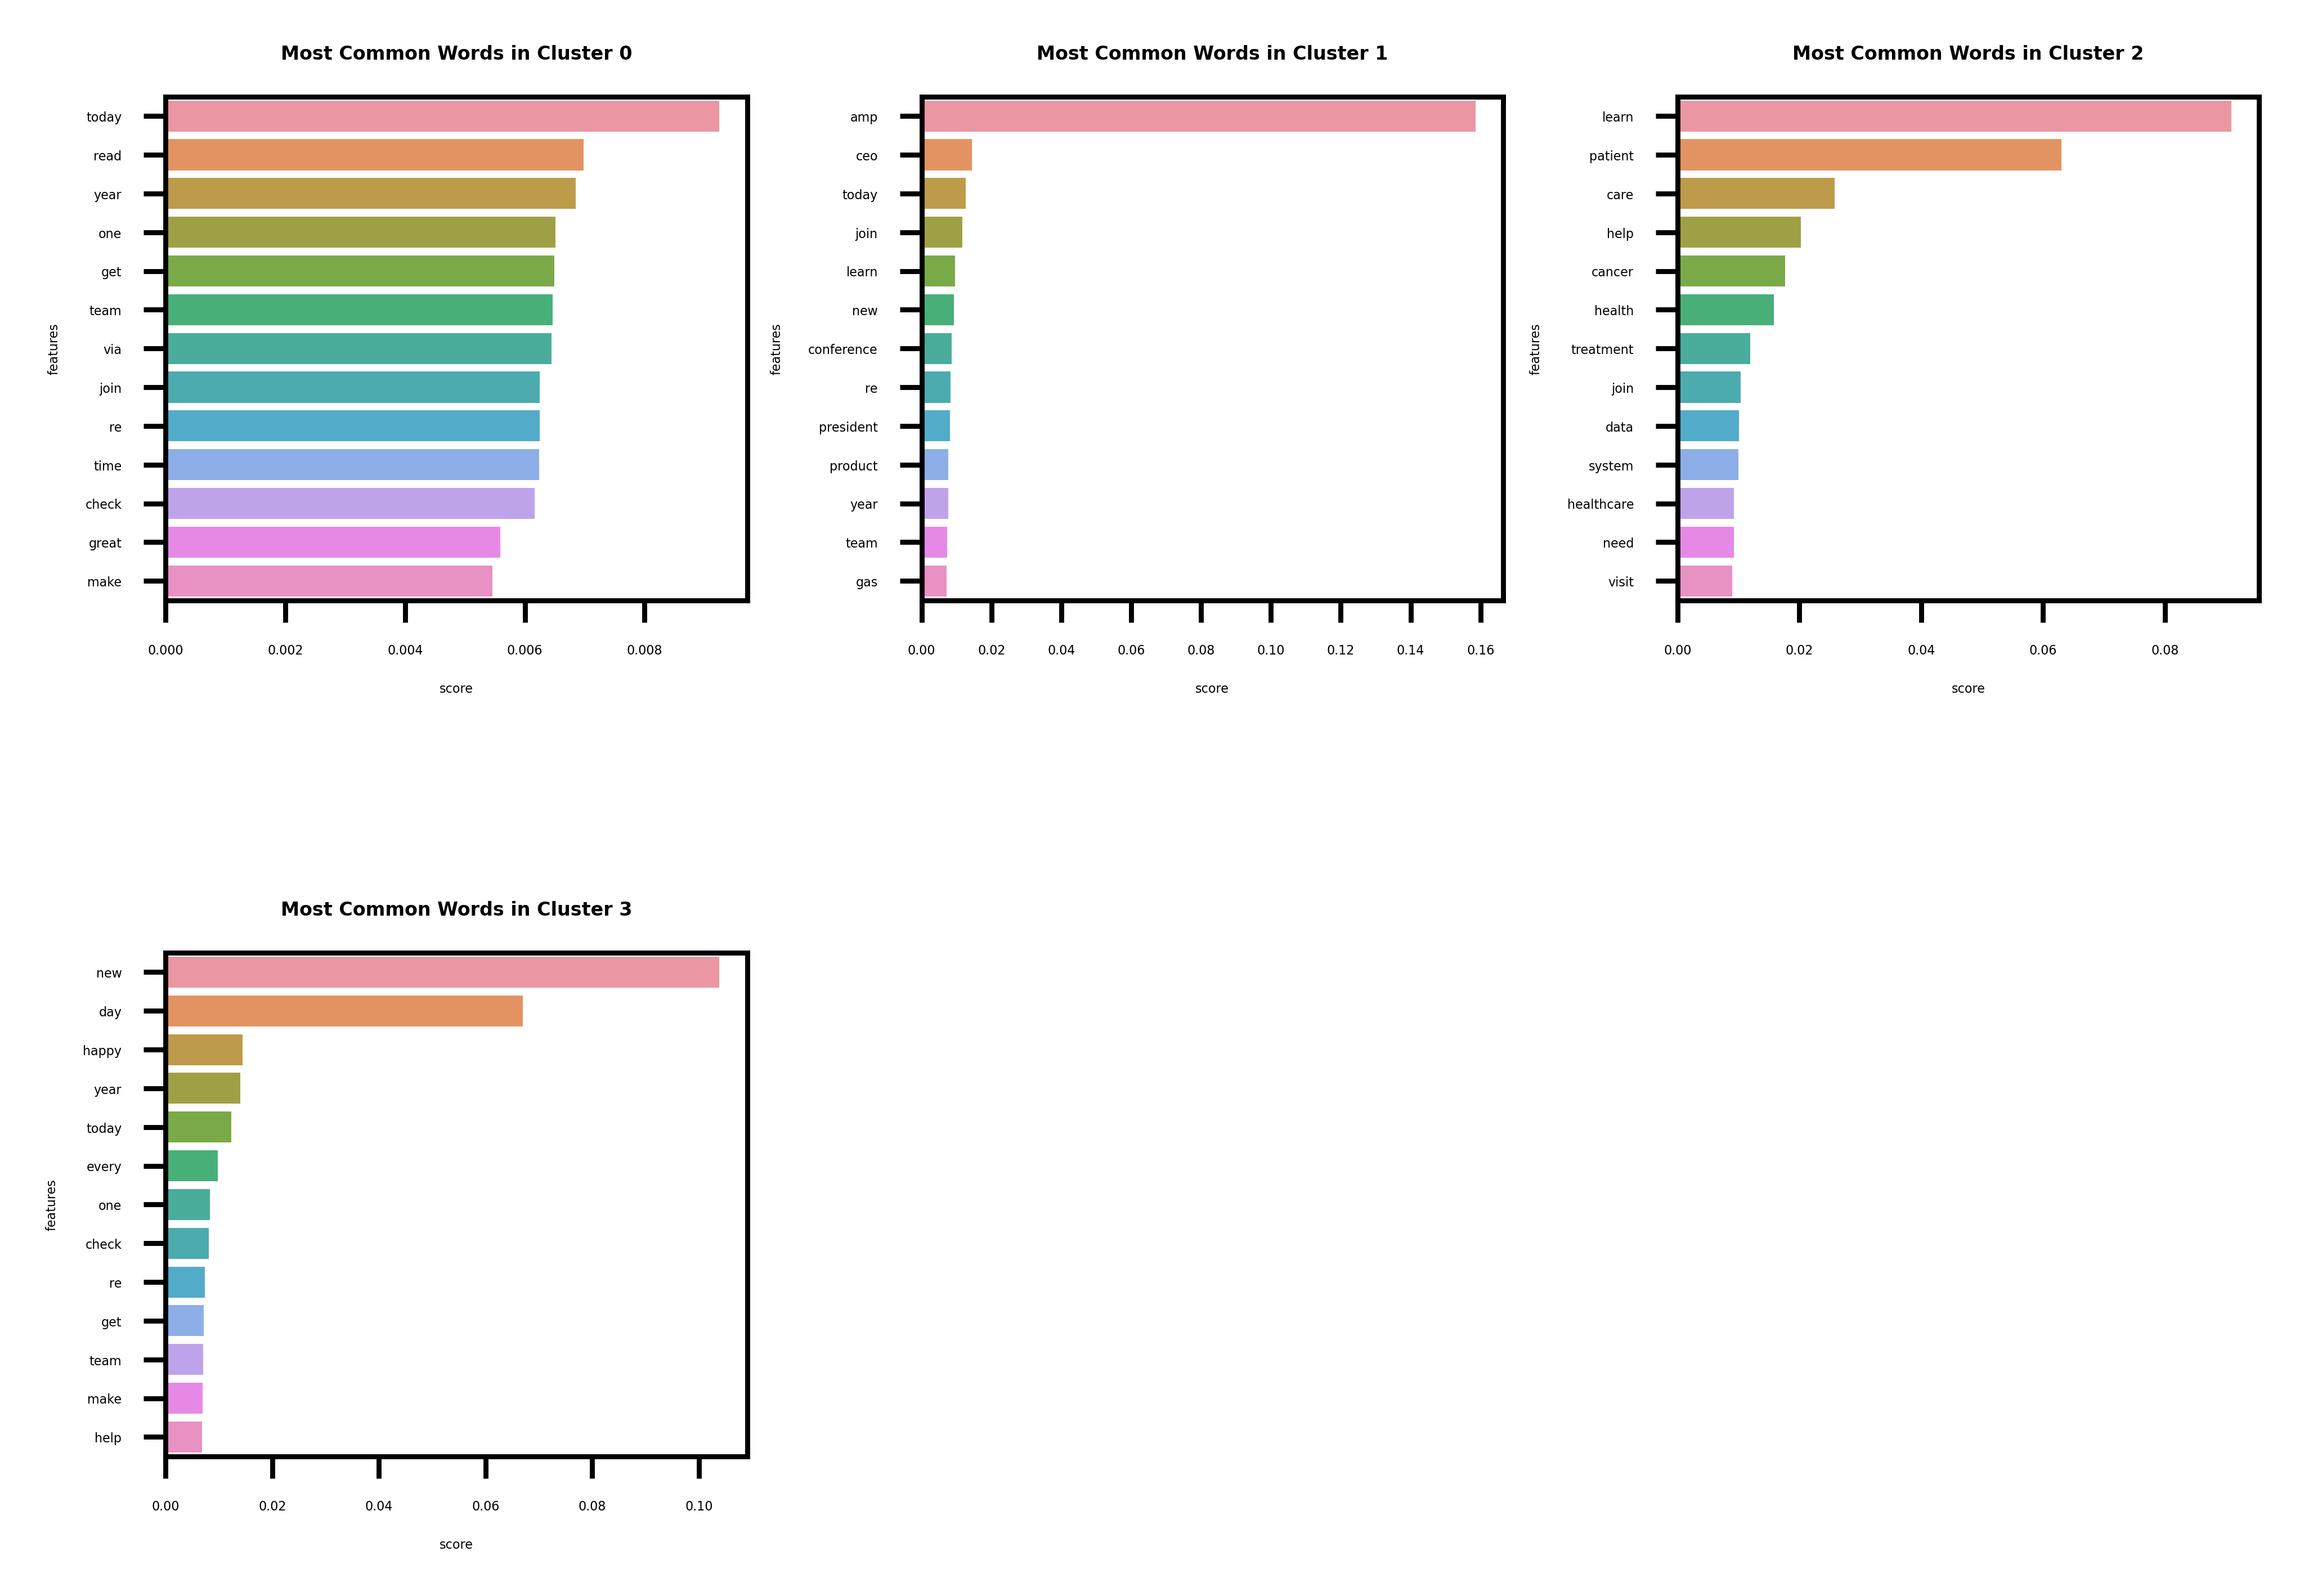

In [17]:
# if black borders in figure just run this cell again

final_df_array = tf_idf.to_numpy()
prediction = df['label']
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13, 3)